<a href="https://colab.research.google.com/github/EsmeBarker/Collab/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No. Different things are easier/harder to predict. A low elpd_loo looks bad, for example, but if the thing we're trying to predict is just extremely difficult to predict, this could actually still be a very good model relative to other ones. We need to compare the elpd_loo to at least one other model if we want to know how effective our model really is.

**Task2**:

Describe overfitting, in the context of this course

Overfitting happens when the model we use fits the curve very well and seems to be effective for the data, but it actually doesn't respond to new data very well. It only works well with the data it's been trained on.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by minimizing how many variables we are using while stil keeping it similarly effective.

**Task4**:

How do we mitigate underfitting?

By comparing models that use different amounts of variables and choosing one that is complex enough(uses enough variables) to make sure we don't miss any important relationships that could've improved our model.

**Task5**:

Why would we want more than one predictor in a model?

Sometimes there are multiple important factors that contribute to something. For example, with the bikes, the hour is very important because of commuters, but precipitation is also important, because people will almost always find alternatives to biking if it is raining. If we don't account for both of these, our model will not be as effective.

**Task6**:

Can we have too many predictors? How would we know?

Yes. You can have too many predictors, and they can prevent your model from adapting well to new data. You can tell that you have too many if your model is not running well with new data. You can also tell by comparing elpd_loo values: if the value was basically the same with less predictors, you shouldn't have added more.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of selecting which variables to use for your model. To select your variables, make a model based off a casual diagram, and a model that uses as many variables as possible. Then, compare the elpd_loo values of both of these. If the casual diagram model looks great, you can stop here. If not, create more models that use less variables, and experiment to see how few variables you can use while still getting a model with similar effectiveness to whichever performed better. Choose the model with the least possible variables.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

1. This assumes that the slope of the linear regression for whatever you're trying to predict will be the same regardless of the value of the categorical variable, and only the intercept will change

2. This one allows you to have different slopes for different values of the categorical variable. They still are sort of pulled towards an overall average, but they can be different.

3. This one is really similar to the second one, except that it actively assumes that the categorical variable will interact with and affect the other variable.





**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You can plot them with bambi on a 2 dimensional graph. If you have more than 2 dimensions, you can use multiple 2 dimensional graphs to get slices of your larger model and visualize it that way. There isn't really a way to visualize the entire model "all at once" past 3 dimensions, and 3 dimensions is pretty hard already.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install bambi

In [8]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
model_basketball = bmb.Model("`FGp` ~ FTp + Pos", data=bb)
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#predictors free throw percentage and position (with position as a hierarchy)
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
model_bb_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3P`:Pos + `3P`:FTp", data=bb)
idata_bb_inter2 = model_bb_inter2.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.
model_bb_inter3 = bmb.Model("`FGp` ~ `FTp` + Pos + `3P`:Pos + `3P`", data=bb)
idata_bb_inter3 = model_bb_inter3.fit(idata_kwargs={'log_likelihood': True})

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

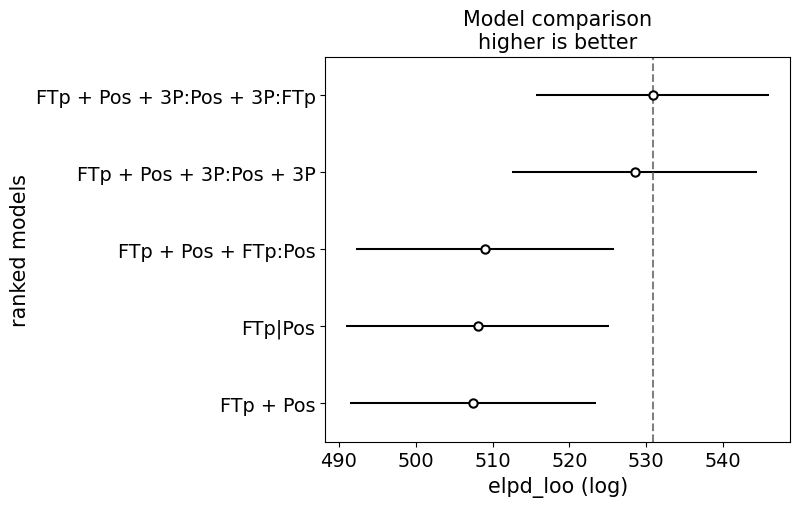

In [30]:
model_dict = {
    "FTp + Pos": idata_basketball,
    "FTp|Pos": idata_basketball_h,
    "FTp + Pos + FTp:Pos": idata_bb_inter,
    "FTp + Pos + 3P:Pos + 3P:FTp": idata_bb_inter2,
    "FTp + Pos + 3P:Pos + 3P": idata_bb_inter3
}
comp_df = az.compare(model_dict)
az.plot_compare(comp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The "best" model here is the one that uses 3 predictors and has interactions between all 3 predictors. This makes sense, since it does the most work to account for all factors. However, the model that only has an interaction between 3P and Pos is what I would actually say is the best to use here, since it is almost exactly as effective and it is simpler.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [31]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [32]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


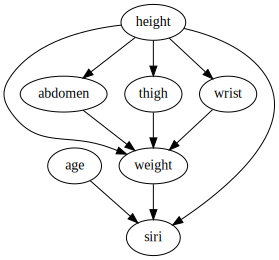

In [36]:
dag_body = gv.Digraph(comment='dag_body')

dag_body.node('A', 'age')
dag_body.node('W','weight')
dag_body.node('H','height')
dag_body.node('Ab', 'abdomen')
dag_body.node('T','thigh')
dag_body.node('Wr', 'wrist')
dag_body.node('S','siri')

dag_body.edges([
    ('A','S'),
    ('W','S'),
    ('H','S'),
    ('H','W'),
    ('Ab','W'),
    ('T','W'),
    ('Wr','W'),
    ('H','Ab'),
    ('H','T'),
    ('H','Wr')
])

dag_body

You should try to predict siri, since all of these variables seem to connect to it in some way, even if indirectly.